<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Template/Discretizationsss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Non-trivial Dummy

In [42]:
# 1. Carga de dados
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')



In [101]:
dummy_pclass = pd.get_dummies(dfTit['Pclass'], prefix= "Classe")
dfTit['Classe_1'] = dummy_pclass['Classe_1']
dfTit['Classe_2'] = dummy_pclass['Classe_2']

dummy_sex = pd.get_dummies(dfTit['Sex'])
dfTit['SexFemale'] = dummy_sex['female']

# Preenchimento de nulos para idades
ageMed = dfTit['Age'].mean()
dfTit['AgeNullTrat'] = dfTit['Age'].fillna(ageMed)

or...

In [105]:
## from sklearn.preprocessing import OneHotEncoder

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              feature_name_combiner='concat', handle_unknown='error',
              max_categories=None, min_frequency=None, sparse_output=True)

In [50]:
import numpy as np


dfTit['WomenChildren'] =np.where(
     dfTit['Age']<14,
     1,
     np.where(
        dfTit['Sex']=='female', 1, 0
     )
)

#dfTit['WomenChildren'] =

#dfTit['Age']<14
dfTit.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WomenChildren
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
# Creating Dummies


Discretisation

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv")

# Analisando
import numpy as np
df[['price']].quantile(np.arange(0,1,0.1))

,price
0.0,326.0
0.1,646.0
0.2,837.0
0.3,1087.0
0.4,1698.0
0.5,2401.0
0.6,3465.0
0.7,4662.0
0.8,6301.2
0.9,9821.0


In [53]:
# Discretização com mesma "largura"
!pip install feature_engine
from feature_engine.discretisation import EqualWidthDiscretiser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.4 MB/s eta 0:00:00


In [79]:
disc = EqualWidthDiscretiser(bins=4, variables='price', return_boundaries=True)
disc.fit(df)
df_transformed = disc.transform(df)
df_transformed.groupby("price").count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
"(-inf, 4950.25]",39013,39013,39013,39013,39013,39013,39013,39013,39013,39013
"(14198.75, inf]",2068,2068,2068,2068,2068,2068,2068,2068,2068,2068
"(4950.25, 9574.5]",9285,9285,9285,9285,9285,9285,9285,9285,9285,9285
"(9574.5, 14198.75]",3574,3574,3574,3574,3574,3574,3574,3574,3574,3574


In [80]:
disc.binner_dict_

{'price': [-inf, 4950.25, 9574.5, 14198.75, inf]}

In [99]:
# Discritação por frequência
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
disc.fit(df[['price']])
df_transformed = disc.transform(df[['price']])

df['price_disc'] = df_transformed

df.head()
df.groupby("price_disc").count()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
price_disc,,,,,,,,,,,
0.0,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483,13483
1.0,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476,13476
2.0,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496,13496
3.0,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485,13485


# Feature Importance
1. Coefficient

In [120]:
from sklearn.linear_model import LogisticRegression


X = dfTit[['AgeNullTrat','SexFemale','Classe_1','Classe_2']]
y = dfTit['Survived']
modLR = LogisticRegression(random_state=0).fit(X, y)

print(modLR.coef_, modLR.intercept_)

[[-0.03130455  2.49730893  2.1577101   1.09687603]] [-1.3351918]


In [136]:
from sklearn.linear_model import LinearRegression
dfPib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

dfPib['BRP_over'] = dfPib['BRP']*1000

X = dfPib[['BRP_over','BRL']]
y = dfPib['PIB']
modLin = LinearRegression().fit(X, y)
print(modLin.coef_, modLin.intercept_)

[0.00057476 0.25862772] 19.21680181578671


In [145]:
#2. Trees/RandomForest
from sklearn.ensemble import RandomForestClassifier

#dfTit['AgeNullTrat_over']=dfTit['AgeNullTrat']*1000

X = dfTit[['AgeNullTrat','SexFemale','Classe_1','Classe_2']]
y = dfTit['Survived']
modRF = RandomForestClassifier(random_state=0).fit(X, y)

print(modRF.feature_importances_, modRF.feature_names_in_)

[0.42818113 0.40931489 0.10563947 0.05686451] ['AgeNullTrat' 'SexFemale' 'Classe_1' 'Classe_2']


<Axes: >

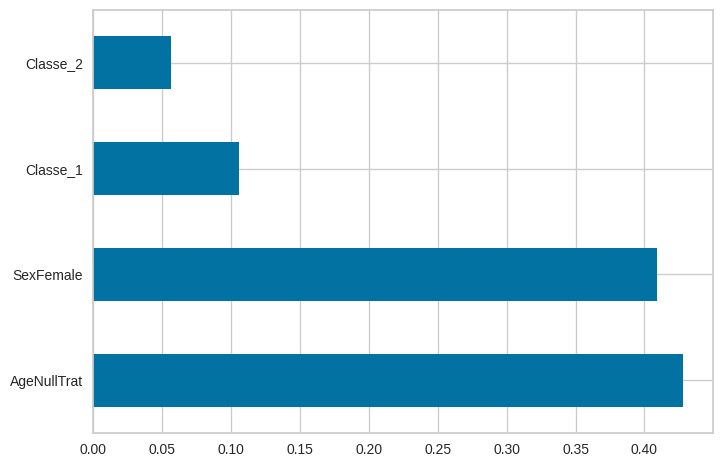

In [147]:
# Graficamente...
feat_importances = pd.Series(modRF.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')

Text(0.5, 0, 'Permutation Importance')

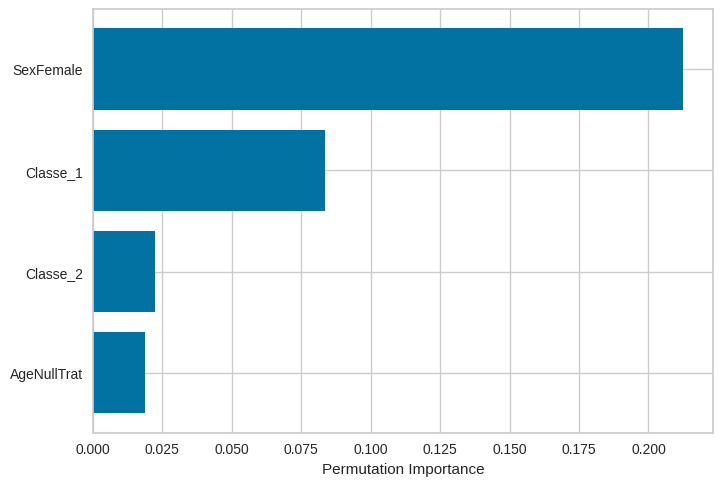

In [152]:
# 3. Permutation
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
#modRF2 = RandomForestClassifier(n_estimators=100)
#modRF2.fit(X_train, y_train)
modLR2 = LogisticRegression(random_state=0).fit(X_train, y_train)

#perm_importance = permutation_importance(modRF2, X_test, y_test)
perm_importance = permutation_importance(modLR2, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# AutoML (Automatization of ML tasks)
Feature Engineering with pyCaret

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/

In [37]:
# Importar biblioteca pycaret
from pycaret.classification import *
import pandas as pd

In [38]:
# 1. Carga de dados
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')


In [39]:
# 1.1 Pre-Processing
dfTit['Pclass'] = dfTit['Pclass'].apply(str)


In [40]:
# 2. Configuração do pycaret
s = setup(dfTit, target='Survived', ignore_features = ['PassengerId', 'Cabin', 'Ticket'])


,Description,Value
0,Session id,1915
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 13)"
5,Transformed train set shape,"(623, 13)"
6,Transformed test set shape,"(268, 13)"
7,Ignore features,3
8,Numeric features,4
9,Categorical features,4


Analyzing Transformations

In [41]:
result = pd.concat([s.X_train, s.X_train_transformed], axis=1, join='inner')
display(result)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_3,Pclass_2,Pclass_1,Name,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
105,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,7.895800,S,1.0,0.0,0.0,0.333714,1.0,28.000000,0.0,0.0,7.895800,1.0,0.0,0.0
760,3,"Garfirth, Mr. John",male,NaN,0,0,14.500000,S,1.0,0.0,0.0,0.333714,1.0,29.778477,0.0,0.0,14.500000,1.0,0.0,0.0
733,2,"Berriman, Mr. William John",male,23.0,0,0,13.000000,S,0.0,1.0,0.0,0.333714,1.0,23.000000,0.0,0.0,13.000000,1.0,0.0,0.0
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,10.500000,S,0.0,1.0,0.0,0.333714,1.0,31.000000,0.0,0.0,10.500000,1.0,0.0,0.0
691,3,"Karun, Miss. Manca",female,4.0,0,1,13.416700,C,1.0,0.0,0.0,0.463823,0.0,4.000000,0.0,1.0,13.416700,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,7.895800,S,1.0,0.0,0.0,0.333714,1.0,29.778477,0.0,0.0,7.895800,1.0,0.0,0.0
626,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,12.350000,Q,0.0,1.0,0.0,0.333714,1.0,57.000000,0.0,0.0,12.350000,0.0,0.0,1.0
596,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,33.000000,S,0.0,1.0,0.0,0.463823,0.0,29.778477,0.0,0.0,33.000000,1.0,0.0,0.0
873,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,9.000000,S,1.0,0.0,0.0,0.333714,1.0,47.000000,0.0,0.0,9.000000,1.0,0.0,0.0


In [17]:
# Age
result = pd.concat([s.X_train.Age, s.X_train_transformed.Age], axis=1, join='inner')
display(result)

,Age,Age
18,31.0,31.000000
593,NaN,30.139456
11,58.0,58.000000
287,22.0,22.000000
210,24.0,24.000000
...,...,...
35,42.0,42.000000
5,NaN,30.139456
445,4.0,4.000000
852,9.0,9.000000


In [24]:
# Pclass
result = pd.concat([s.X_train.Pclass, s.X_train_transformed.Pclass_1], axis=1, join='inner')
display(result)

,Pclass,Pclass_1
519,3,0.0
40,3,0.0
773,3,0.0
580,2,0.0
538,3,0.0
...,...,...
698,1,1.0
303,2,0.0
131,3,0.0
684,2,0.0


In [30]:
# Pclss
result = pd.concat([s.X_train.Name, s.X_train_transformed.Name], axis=1, join='inner')
display(result)

,Name,Name
519,"Pavlovic, Mr. Stefo",0.333714
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0.333714
773,"Elias, Mr. Dibo",0.333714
580,"Christy, Miss. Julie Rachel",0.463823
538,"Risien, Mr. Samuel Beard",0.333714
...,...,...
698,"Thayer, Mr. John Borland",0.333714
303,"Keane, Miss. Nora A",0.463823
131,"Coelho, Mr. Domingos Fernandeo",0.333714
684,"Brown, Mr. Thomas William Solomon",0.333714


In [36]:
# Execução e comparação de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7818,0.0000,0.6361,0.7679,0.6910,0.5250,0.5345,0.8200
ridge,Ridge Classifier,0.7768,0.0000,0.4647,0.9138,0.6055,0.4774,0.5335,0.1410
knn,K Neighbors Classifier,0.6950,0.0000,0.5101,0.6256,0.5593,0.3308,0.3364,0.2680
svm,SVM - Linear Kernel,0.6726,0.0000,0.2652,0.4485,0.3067,0.2037,0.2313,0.1380
et,Extra Trees Classifier,0.6532,0.0000,0.1043,0.7818,0.1701,0.1161,0.2075,0.2580
lda,Linear Discriminant Analysis,0.6244,0.0000,0.0652,0.0600,0.0625,0.0389,0.0390,0.1420
nb,Naive Bayes,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1390
dt,Decision Tree Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1380
rf,Random Forest Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3110
qda,Quadratic Discriminant Analysis,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Detalhamento melhor modelo
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1394, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Análise do melhor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [165]:
s = setup(data = dfTit, target = 'Survived', bin_numeric_features = ['Fare'], normalize=True)

,Description,Value
0,Session id,3682
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 18)"
4,Transformed data shape,"(891, 20)"
5,Transformed train set shape,"(623, 20)"
6,Transformed test set shape,"(268, 20)"
7,Numeric features,12
8,Categorical features,5
9,Rows with missing values,79.5%


In [163]:
s.X_train_transformed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_Q,Embarked_C,WomenChildren,Classe_1,Classe_2,SexFemale,AgeNullTrat,AgeNullTrat_over
37,-1.576113,0.830373,-0.788921,0.731083,-6.516632e-01,-0.495890,-0.482037,-0.804203,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,-0.513509,-0.731083,-0.651668,-0.651668
853,1.616202,-1.564638,1.267555,-1.367833,-1.026234e+00,-0.495890,0.743714,1.283106,-0.412040,2.348001,0.622517,-0.301775,-0.493470,1.242118,1.768001,-0.513509,1.367833,-1.026239,-1.026239
646,0.806387,0.830373,-0.788921,0.731083,-8.014916e-01,-0.495890,-0.482037,-0.804203,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,-0.513509,-0.731083,-0.801496,-0.801496
148,-1.141864,-0.367133,-0.788921,0.731083,5.095068e-01,-0.495890,1.969465,0.697934,-0.412040,1.715727,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,1.947385,-0.731083,0.509502,0.509502
217,-0.871926,-0.367133,-0.788921,0.731083,9.215349e-01,0.454693,-0.482037,0.261374,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,1.947385,-0.731083,0.921530,0.921530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.262598,-1.564638,1.267555,0.731083,2.661487e-16,-0.495890,-0.482037,1.283106,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,1.768001,-0.513509,-0.731083,0.000020,0.000020
619,0.700758,-0.367133,-0.788921,0.731083,-2.770922e-01,-0.495890,-0.482037,-0.804203,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,1.947385,-0.731083,-0.277097,-0.277097
605,0.645988,0.830373,-0.788921,0.731083,4.720497e-01,0.454693,-0.482037,-0.804203,-0.412040,-0.477350,0.622517,-0.301775,-0.493470,-0.805076,-0.565611,-0.513509,-0.731083,0.472045,0.472045
27,-1.615235,-1.564638,-0.788921,0.731083,-8.014916e-01,2.355860,1.969465,0.697934,4.039424,1.715727,0.622517,-0.301775,-0.493470,-0.805076,1.768001,-0.513509,-0.731083,-0.801496,-0.801496
